In [95]:
#그래프생성 라이브러리 import
import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [96]:
import pandas as pd
import numpy as np

In [97]:
#영화순위8/dict타입 data
data = {
    '영화' : ['명량', '극한 직업', '신과 함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번 방의 선물', '암살'],
    '개봉연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270],
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}

In [98]:
df = pd.DataFrame(data)
df

,영화,개봉연도,관객수,평점
0,명량,2014,1761,8.88
1,극한 직업,2019,1626,9.20
2,신과 함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번 방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [99]:
#개봉연도별 영화수
group = df.groupby('개봉연도').size().to_frame()
group

,0
개봉연도,
2006,1
2012,1
2013,1
2014,2
2015,1
2017,1
2019,1


In [100]:
#개봉연도별+영화별, 관객합계/sort_values(ascending=False
group = df.groupby(['개봉연도','영화'])['관객수'].sum()
group = group.to_frame()
group

관객수
개봉연도 영화              
2006 괴물          1301
2012 도둑들         1298
2013 7번 방의 선물    1281
2014 국제시장        1426
     명량          1761
2015 암살          1270
2017 신과 함께-죄와 벌  1441
2019 극한 직업       1626

In [101]:
#개봉연도별, 관객수합계/sort_values(ascending=False
group = df.groupby('개봉연도')['관객수'].sum().to_frame()
df2 = group.copy()
df2.reset_index(inplace=True)
df2['개봉연도'] = df2['개봉연도'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉연도    7 non-null      object
 1   관객수     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


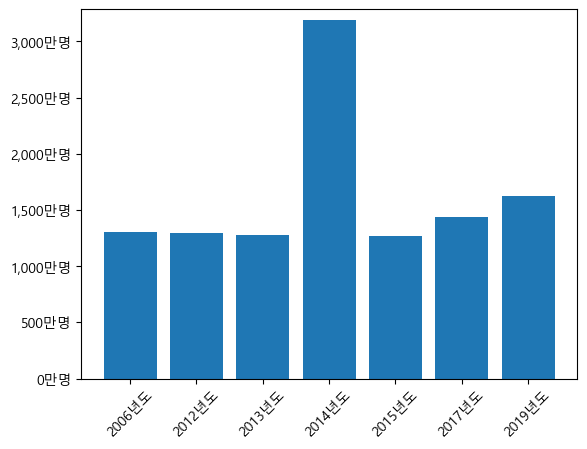

In [102]:
plt.bar(df2['개봉연도'],df2['관객수'])

min=df2['관객수'].min()
max=df2['관객수'].max()


# plt.xticks(df2['개봉연도'], df2['개봉연도']+'년도')
xticks=[x+'년도' for x in df2['개봉연도']]
plt.xticks(df2['개봉연도'], xticks, rotation=45)

plt.ylim(min-100, max+100)
yticks = [y for y in range(0, max+101, 500)]
plt.yticks(yticks, [f'{ytick:,}만명' for ytick in yticks])
plt.show()

In [103]:
min=df2['관객수'].min()
max=df2['관객수'].max()
min, max

(np.int64(1270), np.int64(3187))

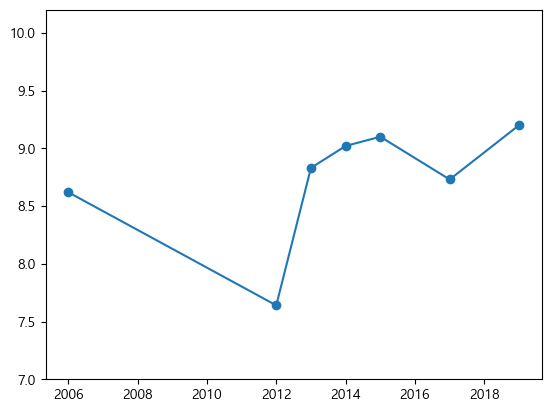

In [107]:
#평균평점
avg = df.groupby('개봉연도')['평점'].mean()
plt.plot(avg.index, avg.values, marker='o')
plt.ylim(7, avg.values.max()+1)
yticks=[y for y in np.arange(7.0,10.5,0.5)] #np로 어레인지 가능 range(정수만)
plt.yticks(yticks)
# plt.xticks(avg['개봉연도'], avg['개봉연도']+'연도', rotation=45)
plt.show()